In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sklearn import __version__

print(__version__)



0.23.2


In [2]:
# data = pd.read_pickle('imputed_data_forest_corr.pkl')
data = pd.read_pickle('imputed_data_forest_2.pkl')

print(list(data.columns))
data.shape

['YEAR', 'ITERATION', 'GPS_LAT', 'GPS_LON', 'GPS_ALT', 'HHsizemembers', 'HHsizeMAE', 'LandOwned', 'LandCultivated', 'LivestockHoldings', 'NrofMonthsFoodInsecure', 'PPI_Threshold', 'PPI_Likelihood', 'score_HDDS_GoodSeason', 'score_HDDS_farmbasedGoodSeason', 'score_HDDS_purchasedGoodSeason', 'score_HDDS_BadSeason', 'score_HDDS_farmbasedBadSeason', 'score_HDDS_purchasedBadSeason', 'TVA_USD_PPP_pmae_pday', 'currency_conversion_factor', 'total_income_USD_PPP_pHH_Yr', 'offfarm_income_USD_PPP_pHH_Yr', 'farm_income_USD_PPP_pHH_Yr', 'value_farm_produce_USD_PPP_pHH_Yr', 'crop_sales_USD_PPP_pHH_Yr', 'value_crop_produce_USD_PPP_pHH_Yr', 'value_crop_consumed_USD_PPP_pHH_Yr', 'livestock_prodsales_USD_PPP_pHH_Yr', 'value_livestock_production_USD_PPP_pHH_Yr', 'value_livestock_prod_consumed_USD_PPP_pHH_Yr', 'Market_Orientation', 'Livestock_Orientation', 'Food_Availability_kCal_MAE_day', 'Food_Self_Sufficiency_kCal_MAE_day', 'NrofMonthsWildFoodCons', 'GHGEmissions', 'Gender_MaleControl', 'Gender_FemaleC

(35726, 98)

In [3]:
X = data.drop(['Food_InsecurityLevel','YEAR','currency_conversion_factor'],axis=1)
# X = data.drop(['Food_InsecurityLevel'],axis=1)
y = data['Food_InsecurityLevel']
print(y)

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_new = scaler.fit_transform(X)
# X_new

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

# from sklearn.feature_selection import SelectFromModel
# from sklearn.decomposition import KernelPCA
# transformer = SelectFromModel(estimator=RandomForestRegressor()).fit(X_new, y)
# X_new = transformer.transform(X_new)
# X_new.shape

fs_ = SelectKBest(score_func=mutual_info_classif, k=70)
fs_.fit(X_new, y)
mi_support = fs_.get_support()
X_new = fs_.transform(X_new)

# clf = ExtraTreesClassifier(n_estimators=60)
# clf = clf.fit(X, y)
# clf.feature_importances_  
# model = SelectFromModel(clf, prefit=True)

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_new, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X_new)

# transformer = SelectFromModel(estimator=AdaBoostClassifier()).fit(X_new, y)
# X_new = transformer.transform(X_new)

# from keras.utils import to_categorical
# y = to_categorical(y)
# y = y[:,[1,2,3,4]]
print(X_new.shape)
y.shape

0        3
1        4
2        4
3        2
4        4
        ..
35721    1
35722    1
35723    1
35724    1
35725    1
Name: Food_InsecurityLevel, Length: 35726, dtype: int32
(35726, 70)


(35726,)

In [4]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_new, y, test_size=0.25, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.25, random_state=0)
# X_train = X_train[:2]
# X_test_val = X_test_val[:2]
# y_train = y_train[:2]
# y_test_val = y_test_val[:2]

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test_val.shape)
print(y_test_val.shape)

(26794, 70)
(26794,)
(8932, 70)
(8932,)


In [7]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model
from keras import regularizers

input_layer = Input(shape=(70,))
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_1 = Dropout(0.6)(hidden_layer1)
hidden_layer2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.6)(hidden_layer2)
hidden_layer3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.6)(hidden_layer3)
hidden_layer4 = Dense(128, activation='relu')(dropout_3)
dropout_4 = Dropout(0.6)(hidden_layer4)
hidden_layer5 = Dense(128, activation='relu')(dropout_4)
output = Dense(5, activation='softmax')(hidden_layer5)
model = Model(inputs = input_layer, outputs = output)



# model = Sequential()
# model.add(Dense(300, input_dim=89, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [8]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               18176     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [9]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test_val, y_test_val), epochs=100)

Epoch 1/100
838/838 [==============================] - 6s 7ms/step - loss: 1.2536 - accuracy: 0.4207 - val_loss: 1.0742 - val_accuracy: 0.5212
Epoch 2/100
838/838 [==============================] - 7s 9ms/step - loss: 1.1015 - accuracy: 0.5268 - val_loss: 1.0663 - val_accuracy: 0.5493
Epoch 3/100
838/838 [==============================] - 7s 9ms/step - loss: 1.0532 - accuracy: 0.5591 - val_loss: 1.0073 - val_accuracy: 0.5784
Epoch 4/100
838/838 [==============================] - 7s 9ms/step - loss: 1.0324 - accuracy: 0.5681 - val_loss: 1.0080 - val_accuracy: 0.5843
Epoch 5/100
838/838 [==============================] - 7s 9ms/step - loss: 1.0153 - accuracy: 0.5786 - val_loss: 0.9879 - val_accuracy: 0.5996
Epoch 6/100
838/838 [==============================] - 7s 9ms/step - loss: 1.0109 - accuracy: 0.5828 - val_loss: 0.9801 - val_accuracy: 0.5955
Epoch 7/100
838/838 [==============================] - 7s 9ms/step - loss: 0.9993 - accuracy: 0.5879 - val_loss: 0.9921 - val_accuracy: 0.5983

Epoch 58/100
838/838 [==============================] - 7s 8ms/step - loss: 0.9106 - accuracy: 0.6313 - val_loss: 0.9119 - val_accuracy: 0.6352
Epoch 59/100
838/838 [==============================] - 7s 8ms/step - loss: 0.9126 - accuracy: 0.6321 - val_loss: 0.9131 - val_accuracy: 0.6318
Epoch 60/100
838/838 [==============================] - 7s 8ms/step - loss: 0.9105 - accuracy: 0.6325 - val_loss: 0.9101 - val_accuracy: 0.6313
Epoch 61/100
838/838 [==============================] - 7s 8ms/step - loss: 0.9117 - accuracy: 0.6290 - val_loss: 0.9130 - val_accuracy: 0.6270
Epoch 62/100
838/838 [==============================] - 7s 8ms/step - loss: 0.9105 - accuracy: 0.6325 - val_loss: 0.9149 - val_accuracy: 0.6311
Epoch 63/100
838/838 [==============================] - 7s 8ms/step - loss: 0.9106 - accuracy: 0.6291 - val_loss: 0.9097 - val_accuracy: 0.6272
Epoch 64/100
838/838 [==============================] - 7s 8ms/step - loss: 0.9104 - accuracy: 0.6324 - val_loss: 0.9018 - val_accuracy:

Train: 0.669, Validation: 0.638


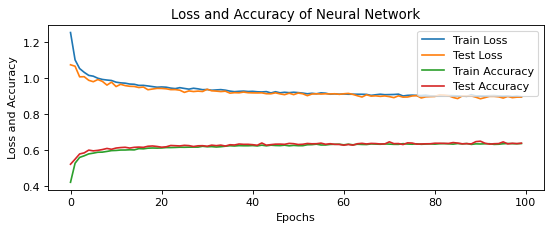

In [10]:
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
# model.predict(X_test_val)
# model.evaluate(X_test_val, y_test_val)
from matplotlib.pyplot import figure


figure(figsize=(8, 6), dpi=80)

# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_val, y_test_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss and Accuracy of Neural Network')
p1, = plt.plot(history.history['loss'])
p2, = plt.plot(history.history['val_loss'])
p3, = plt.plot(history.history['accuracy'])
p4, = plt.plot(history.history['val_accuracy'])

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')



plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend([p1, p2, p3, p4], ['Train Loss', 'Test Loss', 'Train Accuracy', 'Test Accuracy'], loc='upper right', prop=fontP)


140/140 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           1       0.68      0.81      0.74      2831
           2       0.74      0.29      0.41      1520
           3       0.55      0.60      0.57      2353
           4       0.64      0.71      0.67      2228

    accuracy                           0.64      8932
   macro avg       0.65      0.60      0.60      8932
weighted avg       0.65      0.64      0.62      8932

Confusion matrix, without normalization
[[2284   46  288  213]
 [ 571  435  399  115]
 [ 288  103 1406  556]
 [ 197    2  453 1576]]


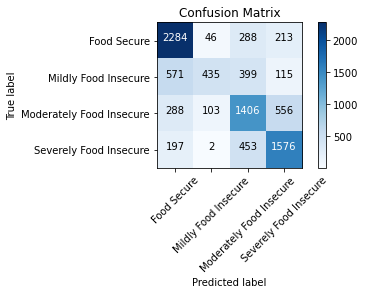

In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test_val, y_pred_bool))

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test_val, y_pred=y_pred_bool)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels=['Food Secure', 'Mildly Food Insecure', 'Moderately Food Insecure', 'Severely Food Insecure']

plot_confusion_matrix(cm=cm, classes=labels, title='Confusion Matrix')
plt.savefig('NN.png',format='png',bbox_inches = "tight")



In [215]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
model = DummyClassifier(strategy='most_frequent')
# fit model
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test_val)
# calculate accuracy
accuracy = accuracy_score(y_test_val, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.317


In [216]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier().fit(X_train, y_train)
score = classifier.score(X_test_val, y_test_val)
score

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6392745185848634

In [217]:
y_pred = classifier.predict(X_test_val)

print(classification_report(y_test_val, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.81      0.74      2831
           2       0.62      0.39      0.48      1520
           3       0.56      0.59      0.58      2353
           4       0.68      0.64      0.66      2228

    accuracy                           0.64      8932
   macro avg       0.63      0.61      0.61      8932
weighted avg       0.64      0.64      0.63      8932



In [574]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier().fit(X_train, y_train)
score1 = classifier1.score(X_test_val, y_test_val)
print(score1)

y_pred1 = classifier1.predict(X_test_val)

print(classification_report(y_test_val, y_pred1))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6553963278101209
              precision    recall  f1-score   support

           1       0.69      0.82      0.75      2831
           2       0.62      0.42      0.50      1520
           3       0.61      0.56      0.59      2353
           4       0.66      0.70      0.68      2228

    accuracy                           0.66      8932
   macro avg       0.65      0.63      0.63      8932
weighted avg       0.65      0.66      0.65      8932



In [573]:
classifier2 = ExtraTreesClassifier().fit(X_train, y_train)
score2 = classifier2.score(X_test_val, y_test_val)
print(score1)

y_pred2 = classifier2.predict(X_test_val)

print(classification_report(y_test_val, y_pred2))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6510300044782803
              precision    recall  f1-score   support

           1       0.70      0.82      0.76      2831
           2       0.62      0.44      0.51      1520
           3       0.61      0.57      0.59      2353
           4       0.67      0.70      0.68      2228

    accuracy                           0.66      8932
   macro avg       0.65      0.63      0.64      8932
weighted avg       0.65      0.66      0.65      8932

